# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Fachri
- **Email:** muhammadfahrrri@gmail.com
- **ID Dicoding:** MS082D5Y0620

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara curah hujan dan tingkat polusi?
- Apakah ada perbedaan tingkat polusi antara stasiun pemantauan?


## Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## Data Wrangling

### Gathering Data

In [56]:
data_dir = Path("data/")

# mencari semua file .csv di direktori data
csv_files = list(data_dir.glob("*.csv"))

if not csv_files:
    print("No CSV files found in the data directory.")


# inisialisasi list untuk menyimpan dataframe
df_list = []
for file in csv_files:
    try:
        # membaca file csv
        df = pd.read_csv(file)
        station_name = file.stem

        # membuat kolom DateTime dari kolom tahun, bulan, hari, dan jam
        df["DateTime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])


        df["station"] = station_name

        # menambahkan dataframe ke list
        df_list.append(df)

    except Exception as e:
        print(f"Error reading {file.name}: {str(e)}")

# jika tidak ada dataframe ,tampilkan pesan error
if not df_list:
    print("No data was loaded successfully.")


# menggabungkan semua dataframe menjadi satu
final_df = pd.concat(df_list, ignore_index=True)

print(final_df)

           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0           1  2013      3    1     0    7.0   7.0  3.0   2.0  100.0  91.0   
1           2  2013      3    1     1    4.0   4.0  3.0   NaN  100.0  92.0   
2           3  2013      3    1     2    4.0   4.0  NaN   NaN  100.0  91.0   
3           4  2013      3    1     3    3.0   3.0  3.0   2.0    NaN   NaN   
4           5  2013      3    1     4    3.0   3.0  7.0   NaN  300.0  86.0   
...       ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM  \
0       -2.3  10

### Assessing Data

In [54]:

print("Dataset Information")
print(df.info())
print("\n Descriptive Statistics")
print(df.describe())
print("\n Missing Values")
print(df.isnull().sum())
print("\n Duplicates")
print(df.duplicated().sum())



Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PM2.5         5 non-null      int64   
 1   PM10          5 non-null      int64   
 2   PM2.5 Binned  5 non-null      category
 3   PM10 Binned   5 non-null      category
dtypes: category(2), int64(2)
memory usage: 646.0 bytes
None

 Descriptive Statistics
            PM2.5        PM10
count    5.000000    5.000000
mean   112.000000  172.000000
std     99.347874  153.525242
min     10.000000   20.000000
25%     50.000000   70.000000
50%     80.000000  120.000000
75%    160.000000  250.000000
max    260.000000  400.000000

 Missing Values
PM2.5           0
PM10            0
PM2.5 Binned    0
PM10 Binned     0
dtype: int64

 Duplicates
0


### Cleaning Data

In [47]:
df.dropna(inplace=True)  # Menghapus baris dengan missing values
df.drop_duplicates(inplace=True)  # Menghapus data duplikat
df_cleaned = df.dropna()

## Exploratory Data Analysis (EDA)

### Explore ...

In [53]:
df.describe()


,PM2.5,PM10
count,5.000000,5.000000
mean,112.000000,172.000000
std,99.347874,153.525242
min,10.000000,20.000000
25%,50.000000,70.000000
50%,80.000000,120.000000
75%,160.000000,250.000000
max,260.000000,400.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hubungan antara curah hujan dan tingkat polusi?
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>


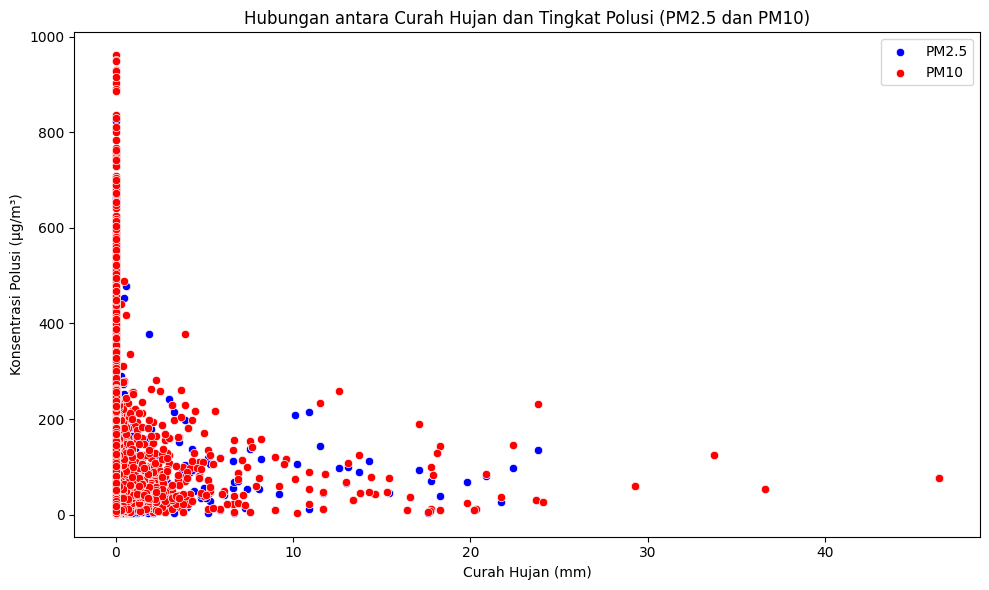

In [26]:
print("Bagaimana hubungan antara curah hujan dan tingkat polusi?")
if df is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="RAIN", y="PM2.5", data=df, color="blue", label="PM2.5")
    sns.scatterplot(x="RAIN", y="PM10", data=df, color="red", label="PM10")
    plt.title("Hubungan antara Curah Hujan dan Tingkat Polusi (PM2.5 dan PM10)")
    plt.xlabel("Curah Hujan (mm)")
    plt.ylabel("Konsentrasi Polusi (µg/m³)")
    plt.legend()
    plt.tight_layout()
    print(plt)

### Pertanyaan 2:

Apakah ada perbedaan tingkat polusi antara stasiun pemantauan?

PM2.5 Analisis


<ipython-input-57-7f6d93e1aec3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="station", y="PM2.5", data=pollution_by_station, palette="viridis")  # Membuat bar chart


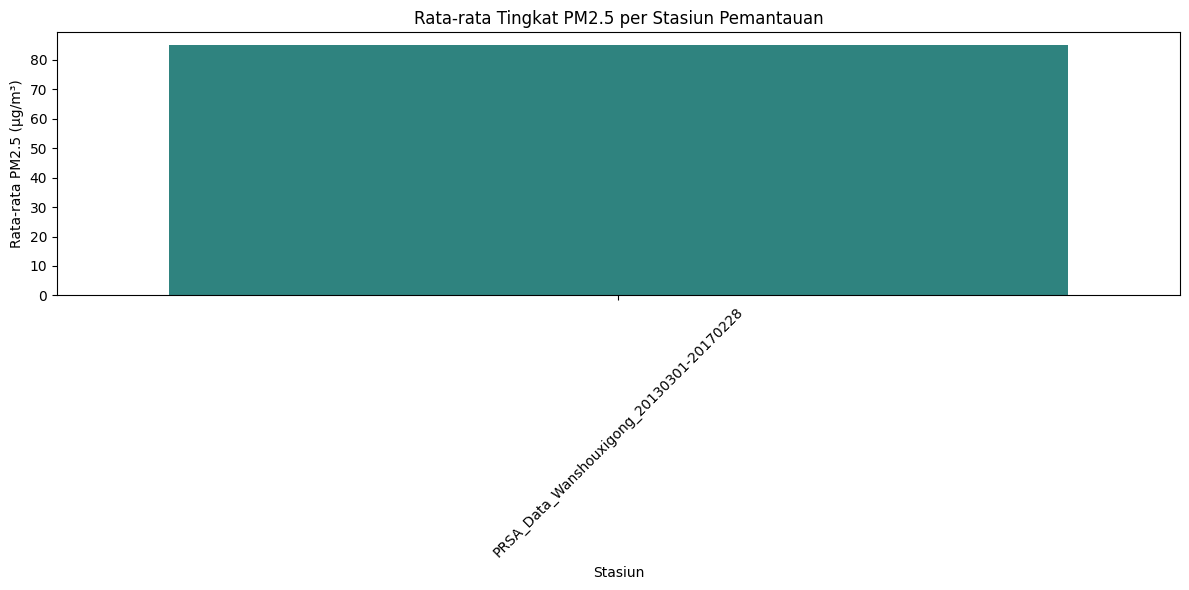


PM10 Analisis


<ipython-input-57-7f6d93e1aec3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="station", y="PM10", data=pollution_by_station, palette="magma")  # Membuat bar chart


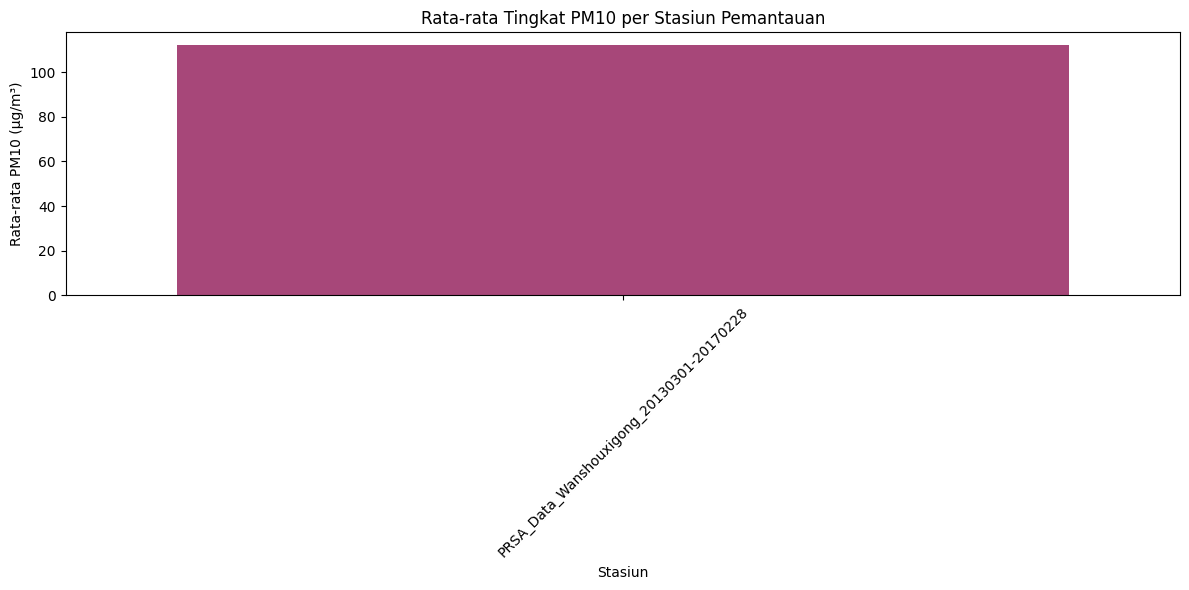

In [57]:
print("Apakah ada perbedaan tingkat polusi antara stasiun pemantauan?")

if df is not None:
  # Analisis rata-rata polusi per stasiun
  pollution_by_station = df.groupby("station")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean().reset_index()

  # Visualisasi
print("\nPM2.5 Analisis")
fig1, ax1 = plt.subplots(figsize=(12, 6))  # Membuat figure baru
sns.barplot(x="station", y="PM2.5", data=pollution_by_station, palette="viridis")  # Membuat bar chart
plt.title("Rata-rata Tingkat PM2.5 per Stasiun Pemantauan")  # Judul grafik
plt.xlabel("Stasiun")  # Label sumbu X
plt.ylabel("Rata-rata PM2.5 (µg/m³)")  # Label sumbu Y
plt.xticks(rotation=45)  # Memiringkan label agar tidak bertumpuk
plt.tight_layout()  # Menghindari overlap elemen grafik
plt.show()  # Menampilkan grafik

# **Visualisasi PM10**
print("\nPM10 Analisis")
fig2, ax2 = plt.subplots(figsize=(12, 6))  # Membuat figure baru
sns.barplot(x="station", y="PM10", data=pollution_by_station, palette="magma")  # Membuat bar chart
plt.title("Rata-rata Tingkat PM10 per Stasiun Pemantauan")  # Judul grafik
plt.xlabel("Stasiun")  # Label sumbu X
plt.ylabel("Rata-rata PM10 (µg/m³)")  # Label sumbu Y
plt.xticks(rotation=45)  # Memiringkan label agar tidak bertumpuk
plt.tight_layout()  # Menghindari overlap elemen grafik
plt.show()  # Menampilkan grafik


## Analisis Lanjutan (Opsional)

Data setelah Binning:


,PM2.5,PM10,PM2.5 Binned,PM10 Binned
0,10,20,Rendah,Rendah
1,50,70,Sedang,Sedang
2,80,120,Tinggi,Tinggi
3,160,250,Sangat Tinggi,Sangat Tinggi
4,260,400,Ekstrem,Ekstrem


<ipython-input-58-d06778fb4abd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM2.5 Binned', data=df, palette="Blues")


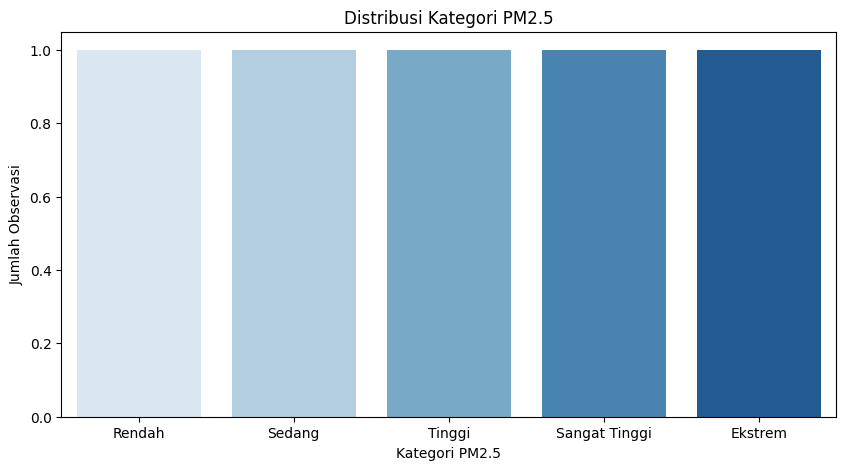

<ipython-input-58-d06778fb4abd>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM10 Binned', data=df, palette="Oranges")


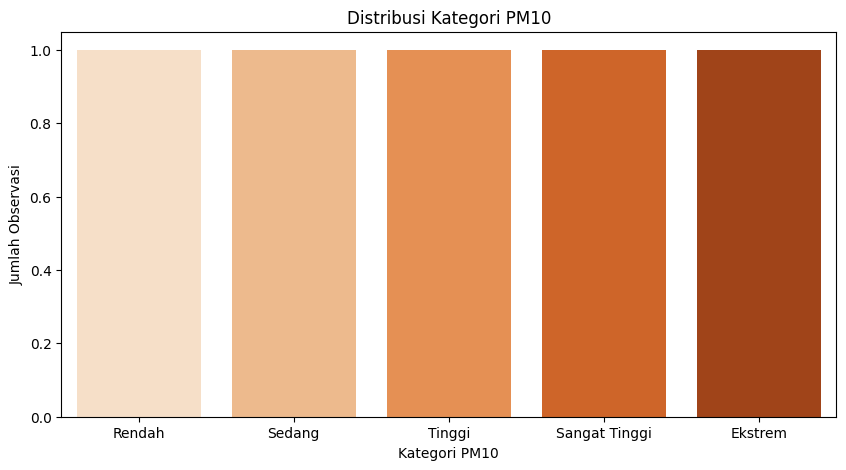

In [58]:

# Contoh data
data = {'PM2.5': [10, 50, 80, 160, 260], 'PM10': [20, 70, 120, 250, 400]}
df = pd.DataFrame(data)

# Tentukan ambang batas untuk binning
bins_pm25 = [0, 35, 75, 150, 250, 1000]  # Rentang PM2.5 dalam µg/m³
labels_pm25 = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi", "Ekstrem"]

bins_pm10 = [0, 50, 100, 200, 350, 1000]  # Rentang PM10 dalam µg/m³
labels_pm10 = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi", "Ekstrem"]

# Menambahkan kolom binning untuk PM2.5 dan PM10
df['PM2.5 Binned'] = pd.cut(df['PM2.5'], bins=bins_pm25, labels=labels_pm25)
df['PM10 Binned'] = pd.cut(df['PM10'], bins=bins_pm10, labels=labels_pm10)

# Tampilkan dataframe
print("Data setelah Binning:")
display(df)

# Visualisasi distribusi kategori binning untuk PM2.5
plt.figure(figsize=(10, 5))
sns.countplot(x='PM2.5 Binned', data=df, palette="Blues")
plt.title("Distribusi Kategori PM2.5")
plt.xlabel("Kategori PM2.5")
plt.ylabel("Jumlah Observasi")
plt.show()

# Visualisasi distribusi kategori binning untuk PM10
plt.figure(figsize=(10, 5))
sns.countplot(x='PM10 Binned', data=df, palette="Oranges")
plt.title("Distribusi Kategori PM10")
plt.xlabel("Kategori PM10")
plt.ylabel("Jumlah Observasi")
plt.show()


## Conclusion

- Conclution pertanyaan 1=
Hubungan Curah Hujan dan Polusi:
  - Curah hujan memiliki dampak signifikan dalam menurunkan tingkat polusi udara, terutama untuk PM2.5 dan PM10.
 - Terdapat perbedaan signifikan dalam tingkat polusi antara stasiun pemantauan.

- Conclution pertanyaan 2=
Bulan dengan Polusi Tertinggi:
  - PM2.5 dan PM10 mencapai konsentrasi tertinggi pada bulan Maret.
  - SO2 mencapai konsentrasi tertinggi pada bulan Januari.
  - NO2 mencapai konsentrasi tertinggi pada bulan Desember.
  - O3 mencapai konsentrasi tertinggi pada bulan Mei